<a href="https://colab.research.google.com/github/LosPowerPeralta/ADA-Informes-Matias/blob/main/Informe_Algoritmo_Bellman_Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Porblema del camino más corto

El problema del camino más corto consiste en determinar la distancia más corta desde un nodo $s$ hasta los demás nodos de nuestro grafo. Para este tipo de problemas existen muchas formas de resolverlos como por ejemplo con la ayuda del algorimo de Dijkstra, el algoritmo de Bellman Ford, el algoritmo de Floyd Warshall, entre otros. Para este informe explicaremos haremos uso de los dos primeros.

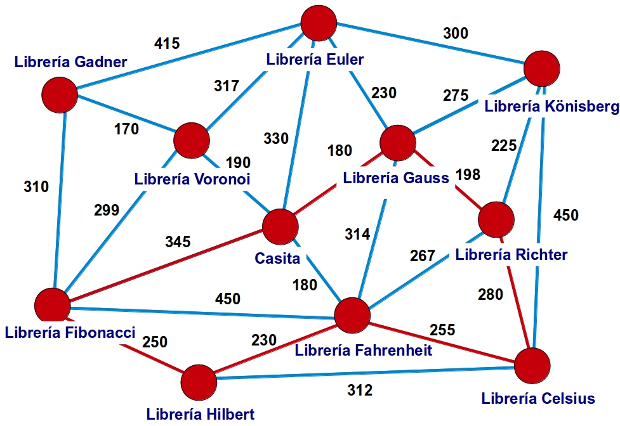

#2. Descripción de los algoritmos 

## Códigos necesarios

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import datetime
from sys import maxsize
from copy import deepcopy
import math as mt
from timeit import repeat
from termcolor import colored

In [ ]:
def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator_negative(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """ 
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator_negative(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator_negative(n)

    return graph, graph[0][0]

In [ ]:
def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator_positive(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """ 
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator_positive(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(1, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(1, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator_positive(n)

    return graph, graph[0][0]

In [ ]:
def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """ 
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

In [ ]:
def listT_to_matrix(graph, V):
    edges = len(graph)
    newGraph = [[0 for i in range(V)] for j in range(V)]

    for node in range(edges):
        for (x, y, peso) in graph:
            newGraph[x][y] = peso

    return newGraph

## 2.1. Algoritmo Bellman Ford.

Este algoritmo viene siendo una de las posibles formas para poder resolver este tipo de ejercicios, a diferencia del algoritmo de Dijkstra este código puede recibir grafos con ciclos negativos, estos ciclos son aquellos en los que los pesos de los arcos a los nodos de llegada son menores que 0 generando un ciclo en donde la distancia mínima desde el nodo inicial hasta el final va disminuyendo cada vez más, cuando ocurren estos casos, el algoritmo de Bellman Ford termina su ejecución y a la vez da aviso de este ciclo negativo, también este algoritmo al verificar si existen o no estos ciclos su tiempo de ejecución varia mucho en comparación al algoritmo de Dijkstra teniendo una complejidad en su caso promedio de $O(V*E)$.

**Sub-estructura óptima**

Consideremos como $L_{i,v}$ el largo mínimo de un camino $s ↝ v$ con a lo más $i - 1$ arcos y ciclos permitidos. Luego para todo $i ≥ 1$ y $v \in V$ tenemos que:

$L_{i,v} =
\min \left\{
 \begin{array}{cc}
 L_{i-1,v} & \text{(case 1)} \\
 \min\limits_{(w,v)\in E} \{L_{i-1,w}+l_{wv}\} & \text{(case 2)}
    	\end{array}
\right\}$

Los subproblemas de base serían, para todo $v \in V$:

$L_{i,v} =
\min \left\{
 \begin{array}{cc}
 0 & \text{si s=v} \\
  +\infty & \text{en otro caso}
    	\end{array}
\right\}$

La sub-estructura óptima de este problema se basa en ir calculando el camino más corto entre el nodo de origen $s\in V$ y cada otro nodo adyacente $v\in V$. Para lo anterior, pueden ocurrir dos casos:

1. Si se conoce la cantidad de arcos de la ruta óptima: Se deben calcular los caminos más cortos entre $s$ y un nodo intermedio $w$ y a esos resultados, sumarles la distancia entre $w$ y $v$, para luego quedarse con el resultado menor, el cuál correspondería al camino más corto. 

2. Si no se conoce la cantidad de arcos de la ruta óptima: El camino más corto entre $s$ y $v$ corresponde al camino más corto con $i - 1$ arcos o menos que se encuentre, con $i ≥ 1$.

### 2.1.1. Código

In [ ]:
from sys import maxsize
 
def BellmanFord(graph, V, E, src, verbose = False, visualize = False):
    if verbose:
        print("Función BellmanFord")
        print("Entrada:")
        print("Grafo:", graph)
        print("Nodo inicial:", src, "\n")
        print("Inicializando arreglos auxiliares...")
        print("Se inicializa la distancia del nodo inicial como 0\n")

    dis = [maxsize] * V
    dis[src] = 0
 

    if verbose:
        print("Se recorren todos los posibles caminos desde el nodo inicial")
        print("hasta todos los nodos adyacentes.\n")

    for i in range(V - 1):
        if verbose:
            print("Nodo a verificar:", i)
        for j in range(E):
            if verbose:
                print("Se verifica si la distancia del nodo", graph[j][0], "hasta el nodo", graph[j][1])
                print("es menor a las calculadas previamente\n")

            if dis[graph[j][0]] + graph[j][2] < dis[graph[j][1]]: # Recuerda para el código de dijkstra "dis[graph[j][0]]"
                if verbose:
                    print("Se lleva a cabo la relajación de nodos")
                dis[graph[j][1]] = dis[graph[j][0]] + graph[j][2] 

    if verbose:
        print("\nSe verifican posibles ciclos negativos.\n")

    flag = False
    for i in range(E):
        x = graph[i][0]
        y = graph[i][1]
        weight = graph[i][2]

        if verbose:
            print(f"ditancia nodo \"{x}\": {dis[x]} != inf y {dis[x]} + {weight} < ditancia nodo \"{y}\": {dis[y]} ?")

        if dis[x] != maxsize and dis[x] + \
                        weight < dis[y]:

            if verbose:
                print("El grafo contiene ciclos negativos")

            flag = True
    

    if not flag and verbose:
        print("El grafo no tiene ciclos negativos.\n")
        print("Distancia desde el origen hasta un nodo V")
        
        for i in range(V):
            print("%d\t\t%d" % (i, dis[i]))

    if visualize:
        g = graph_to_nxdigraph(graph, V)

        pos = nx.spring_layout(g, 20)
        labels = nx.get_edge_attributes(g,'weight')
        nx.draw_networkx_edge_labels(g,pos,edge_labels=labels,font_size=14)
        nx.draw(g,pos, node_color= "red", with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")

## 2.2 Algoritmo de Dijkstra

El algoritmo de Dijkstra es un tipo de algoritmo voraz el cual consiste en determinar el camino más corto a partir de un vertice órigen hacia el resto de vertices con respecto a un peso en cada arista. 

Este algoritmo tiene diversas aplicaciones, como por ejemplo el encaminamiento de paquetes por los routers, aplicaciones para sistemas de información geográficos, entre otras.

Para poder implementar este algoritmo necesitaremos un grafo con $N$ nodos y un vertice inicial $U$ para realizar los calculos, luego con la ayuda de un vector $D$ de largo $N$ irémos calculando y almacenando las distancias desde nuestro nodo inicial $U$ hasta los nodos adyacentes los cuales los llamaremos $V$, una vez que sea encontrado el camino más corto hasta el próximo nodo se marca el actual como visitado y se realiza el cambio del nodo $U$ con el nodo $V$, luego el algoritmo realiza el mismo proceso utilizando la siguiente formula para calcular la distancia más corta hasta el nuevo nodo $V$: $dt(V_i) = D_U + d(U, V_i)$, donde $D_U$ representa la distancia calculada desde el nodo origen hasta el actual y $d(U, V_i)$ representa la distancia desde el nodo actual hasta los adyacentes exceptuando los nodos visitados previamente.

### 2.2.1. Código

In [ ]:
def minDistance(V, dist, visited):
    min = maxsize
    min_index = 0

    for u in range(V):
        if dist[u] < min and visited[u] == False:
            min = dist[u]
            min_index = u
    
    return min_index

In [83]:
def Dijkstra(graph, V, src, verbose = False):
    if verbose:
        print("Función Dijkstra")
        print("Entrada:")
        print("Grafo =", graph)
        print("Nodo inicial =", src, "\n")
        print("Se inicializan los arreglos auxiliares...")
        print("Se inicializa la distancia del punto de origen en 0...\n")

    dist = [maxsize] * V
    dist[src] = 0
    visited = [False] * V
 
    if verbose:
        print("Se verifican las distancias de los nodos")

    for cout in range(V):
        
        if verbose:
            print("Se busca el nodo que contiene la distancia mínima")
            print("y se marca como visitado\n")

        x = minDistance(V, dist, visited)
 
        visited[x] = True
        
        if verbose:
            print("Se verifican los nodos adyacentes al cual contiene")
            print("la distancia mínima\n")

        for y in range(V):
            if verbose:
                print(f"distancia nodo {x} y {y}: {graph[x][y]} > 0?")
                print(f"Nodo {y} visitado? {visited[y]}")
                print(f"distancia nodo {y}: {dist[y]} > distancia nodo {x}: {dist[x]} + distancia nodo adyacente: {graph[x][y]}")

            if graph[x][y] > 0 and visited[y] == False and \
                    dist[y] > dist[x] + graph[x][y]:

                if verbose:
                    print("Condiciones cumplidas, se lleva a cabo la relajación de nodos")
                dist[y] = dist[x] + graph[x][y]

            if verbose:
                print("")
    if verbose:
        print("Distancia desde el origen hasta un nodo V")
        for node in range(V):
            print(node, "\t", dist[node])

#3. Ejecución paso a paso


In [ ]:
V = 5
graph, s = instance_generator_positive(V)
graph2 = listT_to_matrix(graph, V) 

##3.1. Algoritmo de Bellam Ford (Verbose = True y visualize = True)

Función BellmanFord
Entrada:
Grafo: [(4, 0, 100), (4, 3, 43), (4, 1, 69), (2, 1, 24), (2, 4, 57), (0, 1, 90), (1, 3, 49), (0, 2, 44)]
Nodo inicial: 4 

Inicializando arreglos auxiliares...
Se inicializa la distancia del nodo inicial como 0

Se recorren todos los posibles caminos desde el nodo inicial
hasta todos los nodos adyacentes.

Nodo a verificar: 0
Se verifica si la distancia del nodo 4 hasta el nodo 0
es menor a las calculadas previamente

Se lleva a cabo la relajación de nodos
Se verifica si la distancia del nodo 4 hasta el nodo 3
es menor a las calculadas previamente

Se lleva a cabo la relajación de nodos
Se verifica si la distancia del nodo 4 hasta el nodo 1
es menor a las calculadas previamente

Se lleva a cabo la relajación de nodos
Se verifica si la distancia del nodo 2 hasta el nodo 1
es menor a las calculadas previamente

Se verifica si la distancia del nodo 2 hasta el nodo 4
es menor a las calculadas previamente

Se verifica si la distancia del nodo 0 hasta el nodo 1
e

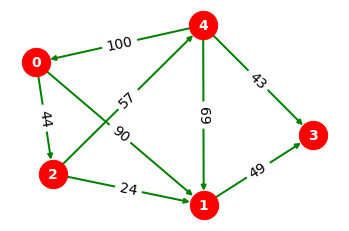

In [ ]:
BellmanFord(graph, V, len(graph), s, verbose= True, visualize= True)

##3.2. Algoritmo de Dijkstra (verbose = True y visualize = True)

In [ ]:
Dijkstra(graph2, V, s, verbose= True)

Función Dijkstra
Entrada:
Grafo = [[0, 90, 44, 0, 0], [0, 0, 0, 49, 0], [0, 24, 0, 0, 57], [0, 0, 0, 0, 0], [100, 69, 0, 43, 0]]
Nodo inicial = 4 

Se inicializan los arreglos auxiliares...
Se inicializa la distancia del punto de origen en 0...

Se verifican las distancias de los nodos
Se busca el nodo que contiene la distancia mínima
y se marca como visitado

Se verifican los nodos adyacentes al cual contiene
la distancia mínima

distancia nodo 4 y 0: 100 > 0?
Nodo 0 visitado? False
distancia nodo 0: 9223372036854775807 > distancia nodo 4: 0 + distancia nodo adyacente: 100
Condiciones cumplidas, se lleva a cabo la relajación de nodos

distancia nodo 4 y 1: 69 > 0?
Nodo 1 visitado? False
distancia nodo 1: 9223372036854775807 > distancia nodo 4: 0 + distancia nodo adyacente: 69
Condiciones cumplidas, se lleva a cabo la relajación de nodos

distancia nodo 4 y 2: 0 > 0?
Nodo 2 visitado? False
distancia nodo 2: 9223372036854775807 > distancia nodo 4: 0 + distancia nodo adyacente: 0

distan

#4. Correctitud algoritmo de Bellman Ford

##**Teorema**

El algoritmo de Bellman Ford calcula la distancia desde un nodo inicial $s$ al resto de nodos adyacentes $v$ sin ciclos negativos.

##Prueba del teorema

Para demostrar la correctitud de este algoritmo haremos uso de la demostración por inducción, para esto necesitaremos de un caso base y de un caso inductivo.

> Caso base ($V = 1$): El caso base ocurre cuando la cantidad de nodos $V = 1$, como es el único nodo de nuestro grafo el algoritmo asume directamente que la distancia $d(s,v) = 0$, por lo tanto podemos confirmar que para nuestro caso base el algoritmo funciona.

> Caso inductivo ($V = k + 1$): Para realizar la prueba de nuestro caso inductivo consideraremos que para una cantidad de $k$ nodos nuestro algoritmo consigue encontrar el camino mínimo desde el nodo inicial hasta los $k - 1$ nodos adyacentes, por lo tanto ahora toca demostrar que para $k + 1$ nodos esto también funciona. Sabemos que para cada iteración $i + 1$ se cumple $d[v, i + 1] ≤ d[u, i] + w[u, v]$ por el paso de reajuste del algoritmo. Como en cada iteración se recorren todos los arcos del grafo podemos asegurar que el algoritmo en todo momento conseguirá la distancia más corta entre el nodo $s$ hasta $v$.

#5. Tiempo de Ejecución

##5.1. Algoritmo Bellman Ford

###**Caso Promedio**

Como podemos ver analizando el código, nuestro algoritmo necesitará la ayuda dos ciclos iterativos para poder encontrar el camino más corto y un tercero para verificar si había un ciclo negativo o no, el primer ciclo recorre la cantidad de nodos desde $0$ hasta $V - 1$ donde $V$ representa la cantidad de Nodos, el segundo ciclo se recorre desde $0$ hasta $E$ donde $E$ representa la cantidad de arcos de nuestro grafo y el tercer ciclo va desde $0$ hasta $E$.

Por lo tanto al tener este analisis previo y conociendo el código de nuestro algoritmo podemos definir una función que represente la cantidad de procesos realizados.

$T(V, E) = \sum\limits_{i = 0}^{V - 1}(\sum\limits_{j = 0}^{E}(1)) + \sum\limits_{k = 0}^{E}(1)$

$T(V, E) = \sum\limits_{i = 0}^{V - 1}(c*E) + c*E$

$T(V, E) = c*E*V + c*E$

$T(V, E) = O(V*E) + O(E)$

Por lo tanto la complejidad temporal de nuestro caso promedio viene siendo de O(V*E).

###**Mejor caso**

Para demostrar el mejor caso se debe tener algo en cuenta, este ocurre cuando todos los nodos con sus arcos se encuentran alineados de la siguiente forma.




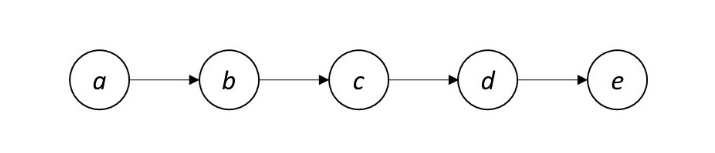

Es este caso el calculo del camino más corto se realiza muy rápido ya que el algoritmo solo tendrá que verificar un solo nodo de llega y no deberá recorrer una cantidad $V$ de nodos adyacentes, así que para este caso solo necesitaremos 2 iteraciones por los arcos del grafo, el primero será para calcular los caminos más cortos y el otro para verificar que no ocurran más cambios en las ditancias. Por lo tanto la complejidad es de $O(E)$.

###**Peor caso**

El peor caso ocurrirá cuando el grafo analizado sea un grafo completo, a esto nos referimos que para una cantidad $V$ de nodos habrá una cantidad $V(V - 1)$ al ser un grafo dirigido. por lo tanto nuestra función quedará de la siguiente forma.

$T(V, V(V - 1)) = \sum\limits_{i = 0}^{V - 1}(\sum\limits_{j = 0}^{V(V - 1)}(1)) + \sum\limits_{k = 0}^{V(V - 1)}(1)$

$T(V, V(V - 1)) = \sum\limits_{i = 0}^{V - 1}(c*V(V - 1)) + c*V(V-1)$

$T(V, V(V - 1)) = c*V(V - 1) * V + c(V^2-V)$

$T(V, V(V - 1)) = c*V^2(V - 1) + O(V^2)$

$T(V, V(V - 1)) = c*(V^3 - V^2) + O(V^2)$

$T(V, V(V - 1)) = O(V^3) + O(V^2)$

$T(V, V(V - 1)) = O(V^3)$

Por lo tanto con esto podemos demostrar que el tiempo de ejecución de nuestro algoritmo es de $O(V^3)$.

#5.2. Algoritmo de Dijkstra

Para analizar el tiempo de ejecución de nuestro algoritmo primero debemos analizar el código, como podemos apreciar tenemos un primer ciclo el cual recorre desde 0 hasta $V$ donde $V$ representa la cantidad de nodos de nuestro grafo, y a la vez este algoritmo contiene otro ciclo anidado el cual también va desde 0 hasta $V$, teniendo esto en cuenta podemos realiza la siguiente función.

$T(V) = \sum\limits_{i = 0}^{V}(\sum\limits_{j = 0}^{V}(1))$

$T(V) = \sum\limits_{i = 0}^{V}(c*V)$

$T(V) = c*V * V$

$T(V) = c*V^2$

$T(V) = O(V^2)$

Por lo tanto al ver este analisis podemos verificar que la complejidad temporal de nuestro algoritmo es de $O(V^2)$.

#6. Experimentos

##Bellman Ford vs Tiempo teorico

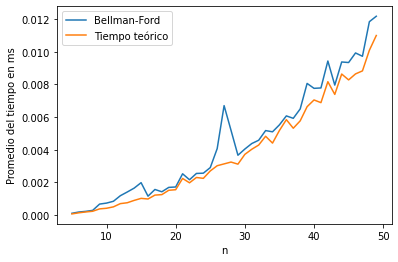

In [106]:
x = []
y = []
y_teo = []

for n in range(5,50):
    graph, s = instance_generator_positive(n)
    prom = 0


    tiempo = repeat(setup="from __main__ import BellmanFord", stmt=f"BellmanFord({graph},{n},{len(graph)},{s})", repeat=1, number=10)

    x.append(n)
    y.append(tiempo)
    y_teo.append((n*len(graph) + len(graph)) / 500000)

plt.plot(x,y)
plt.plot(x,y_teo)
plt.legend(["Bellman-Ford", "Tiempo teórico"])
plt.xlabel('n')
plt.ylabel('Promedio del tiempo en ms')
plt.show()

Por lo que podemos observar lo calculado en el tiempo de ejecución es correcto, solo hubo que ajustar la escala dividiendo en 500 mil, porque esa escala es en la que tardan los subproblemas en resolverse por el entorno de ejecución, además cabe recalcar que los peaks como se comprobó anteriormente tienen relación a procesos externos al algoritmo.

##Algoritmo de Bellman Ford vs Dijkstra

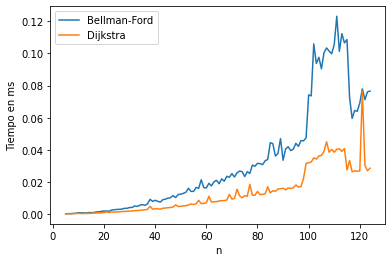

In [88]:
x=[]
y_d = []
y_b = []

for n in range(5,125):
  graph, s = instance_generator_positive(n)
  graph2 = listT_to_matrix(graph, n) 
  
  #la función repeat está ejecutando 10 veces Bellman-Ford retorna el mejor tiempo obtenido.
  t_b = repeat(setup="from __main__ import BellmanFord", stmt=f"BellmanFord({graph},{n},{len(graph)},{s})", repeat=1, number=10)

  #la función repeat está ejecutando 10 veces Dijkstra retorna el mejor tiempo obtenido.
  t_d = repeat(setup="from __main__ import Dijkstra", stmt=f"Dijkstra({graph2},{n},{s})", repeat=1, number=10)

  x.append(n)
  y_b.append(t_b)
  y_d.append(t_d)

plt.plot(x,y_b)
plt.plot(x,y_d)
plt.legend(["Bellman-Ford", "Dijkstra"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Como se puede apreciar, el algoritmo de Bellman Ford tiene un tiempo de ejecucón mayor que el algoritmo de Dijkstra, esto se puede deber a la cantidad de arcos que tiene los grafos generados aleatoriamente ya que como fue explicado en el tiempo de ejecución este depende mucho de de los arcos, en cambio el de Dijksta al depender de los nodos es más estables y además realiza menos comparaciones al no tener la necesidad de buscar ciclos negativos.